<a href="https://colab.research.google.com/github/YaseenHQ/LIME/blob/main/LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
pip install lime


In [28]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Load the lris dataset
iris = load_iris()
x= iris.data
y= iris.target
feature_names = iris.feature_names
class_names = iris.target_names
print ("Feature names:",feature_names)
print ("Class names:", class_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class names: ['setosa' 'versicolor' 'virginica']


In [29]:
#Split the data into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#train a RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Choose an instance from the test set for explanation
instance_idx=10
instance=x_test[instance_idx]
# Get the predicted probabilities for each class
pred_probs=model.predict_proba(instance.reshape(1,-1))
# Print the predicted probabilities
for class_idx,class_name in enumerate(class_names):
  print(f"Predicted probability for {class_name}:{pred_probs[0][class_idx]}")


Predicted probability for setosa:0.0
Predicted probability for versicolor:0.05
Predicted probability for virginica:0.95


LIME Explanation:
4.25 < petal length (cm) <= 5.100.2095
petal width (cm) > 1.80       -0.2049
3.00 < sepal width (cm) <= 3.400.0227
sepal length (cm) > 6.40      0.0084


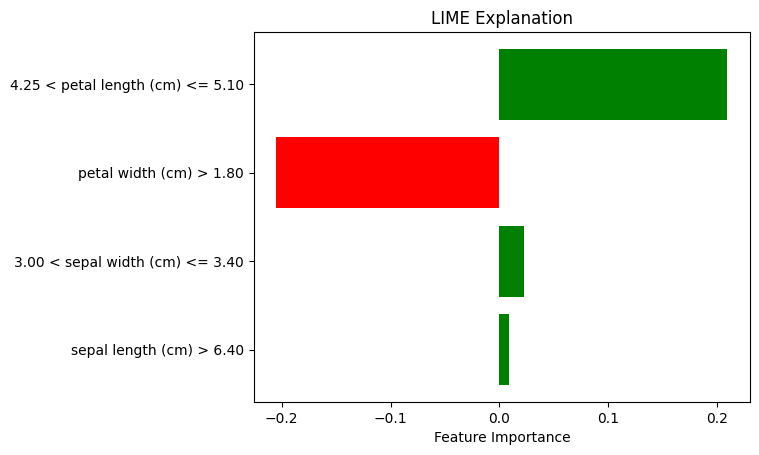

In [31]:
# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train,feature_names=feature_names, class_names=class_names)
# Explain the instance's prediction using LIME
explanation = explainer.explain_instance(instance, model.predict_proba,num_features=len(feature_names))
#Print the nicely formatted explanation
print("LIME Explanation:")
for feature, weight in explanation.as_list():
  print(f"{feature:<30}{weight:.4f}")
# Plot the explanation
fig = explanation.as_pyplot_figure()
plt.title("LIME Explanation")
plt.xlabel("Feature Importance")
plt.show()
